In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import datasets, metrics, svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [2]:
are_c = gpd.read_file("are_mean_median_with_LISA_corporate_withMeta.geojson")
col_c = gpd.read_file("col_mean_median_with_LISA_corporate_withMeta.geojson")
idn_c = gpd.read_file("idn_mean_median_with_LISACorporate_withMeta.geojson")

In [3]:
are_nc = gpd.read_file("are_mean_median_with_LISA_non_corporate_withMeta.geojson")
col_nc = gpd.read_file("col_mean_median_with_LISA_non-corporate_withMeta.geojson")
idn_nc = gpd.read_file("idn_mean_median_with_LISA_non-corporate_withMeta.geojson")

the siq_quadrant / sig_quadrant columns were calculated in QGIS during map creation: it represents all cells with significant values and their quadrant.

In [4]:
are_corporate = are_c[['fid', 'siq_quadrant']].fillna(0)
are_corporate = are_corporate.rename(columns = {'siq_quadrant' : 'corporate'})

are_non_corporate = are_nc[['fid', 'siq_quadrant']].fillna(0)
are_non_corporate = are_non_corporate.rename(columns = {'siq_quadrant' : 'non-corporate'})

In [5]:
col_corporate = col_c[['fid', 'sig_quadrant']].fillna(0)
col_corporate = col_corporate.rename(columns = {'sig_quadrant' : 'corporate'})

col_non_corporate = col_nc[['fid', 'sig_quadrant']].fillna(0)
col_non_corporate = col_non_corporate.rename(columns = {'sig_quadrant' : 'non-corporate'})

In [6]:
idn_corporate = idn_c[['fid', 'sig_quadrant']].fillna(0)
idn_corporate = idn_corporate.rename(columns = {'sig_quadrant' : 'corporate'})

idn_non_corporate = idn_nc[['fid', 'siq_quadrant']].fillna(0)
idn_non_corporate = idn_non_corporate.rename(columns = {'siq_quadrant' : 'non-corporate'})

In [7]:
are_combi = pd.merge(are_corporate, are_non_corporate, on = 'fid', how = 'inner')
col_combi = pd.merge(col_corporate, col_non_corporate, on = 'fid', how = 'inner')
idn_combi = pd.merge(idn_corporate, idn_non_corporate, on = 'fid', how = 'inner')

### United Arab Emirates

In [8]:
y_true = are_combi['non-corporate']
y_pred = are_combi['corporate']
are = confusion_matrix(y_true, y_pred,normalize='all')

In [9]:
are_df = pd.DataFrame(are)

In [10]:
are_df

,0,1,2,3
0,0.799836,0.041017,0.004102,0.054963
1,0.021329,0.013126,0.000000,0.000000
2,0.014766,0.000000,0.000000,0.000000
3,0.046760,0.000000,0.000000,0.004102


Confusion matrix:
[[0.79983593 0.04101723 0.00410172 0.05496308]
 [0.02132896 0.01312551 0.         0.        ]
 [0.0147662  0.         0.         0.        ]
 [0.04675964 0.         0.         0.00410172]]


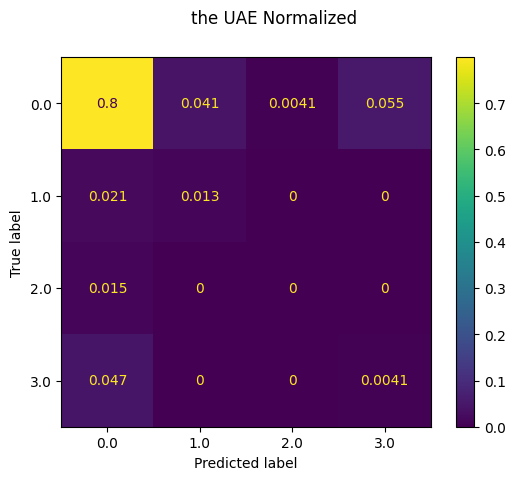

In [18]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize = 'all')
disp.figure_.suptitle("the UAE Normalized")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### Indonesia

In [12]:
y_true_i = idn_combi['non-corporate']
y_pred_i = idn_combi['corporate']
idn = confusion_matrix(y_true_i, y_pred_i, normalize = 'all')
idn_df = pd.DataFrame(idn)

In [13]:
idn_df

,0,1,2,3,4
0,0.842219,0.018479,0.004509,0.031167,0.005570
1,0.028294,0.003625,0.001105,0.003183,0.000707
2,0.003095,0.000531,0.000221,0.000752,0.000000
3,0.026569,0.003846,0.001813,0.016976,0.001636
4,0.003979,0.000398,0.000221,0.000928,0.000177


Confusion matrix:
[[8.42219275e-01 1.84792219e-02 4.50928382e-03 3.11671088e-02
  5.57029178e-03]
 [2.82935455e-02 3.62511052e-03 1.10521662e-03 3.18302387e-03
  7.07338638e-04]
 [3.09460654e-03 5.30503979e-04 2.21043324e-04 7.51547303e-04
  0.00000000e+00]
 [2.65694076e-02 3.84615385e-03 1.81255526e-03 1.69761273e-02
  1.63572060e-03]
 [3.97877984e-03 3.97877984e-04 2.21043324e-04 9.28381963e-04
  1.76834660e-04]]


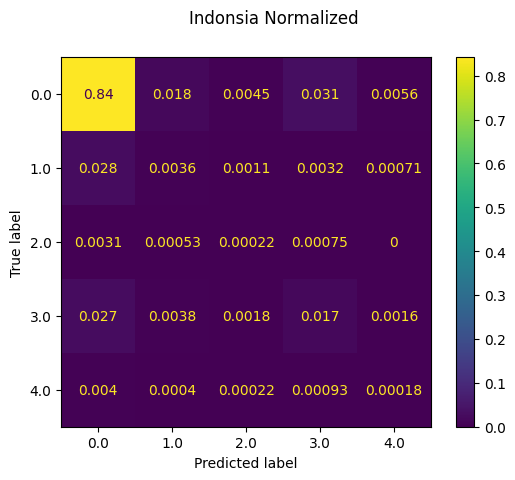

In [14]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_true_i, y_pred_i, normalize = 'all')
disp.figure_.suptitle("Indonsia Normalized")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### Colombia

In [15]:
y_true_c = col_combi['non-corporate']
y_pred_c = col_combi['corporate']
col = confusion_matrix(y_true_c, y_pred_c, normalize = 'all')
col_df = pd.DataFrame(col)

In [16]:
col_df

,0,1,2,3,4
0,0.781470,0.023081,0.022099,0.060894,0.006548
1,0.032493,0.003519,0.001473,0.004747,0.000900
2,0.004174,0.000409,0.000000,0.000818,0.000082
3,0.024881,0.005402,0.001310,0.004174,0.000327
4,0.015960,0.001146,0.001064,0.002619,0.000409


Confusion matrix:
[[7.81469962e-01 2.30807006e-02 2.20985431e-02 6.08937633e-02
  6.54771648e-03]
 [3.24930431e-02 3.51939761e-03 1.47323621e-03 4.74709445e-03
  9.00311017e-04]
 [4.17416926e-03 4.09232280e-04 0.00000000e+00 8.18464560e-04
  8.18464560e-05]
 [2.48813226e-02 5.40186610e-03 1.30954330e-03 4.17416926e-03
  3.27385824e-04]
 [1.59600589e-02 1.14585038e-03 1.06400393e-03 2.61908659e-03
  4.09232280e-04]]


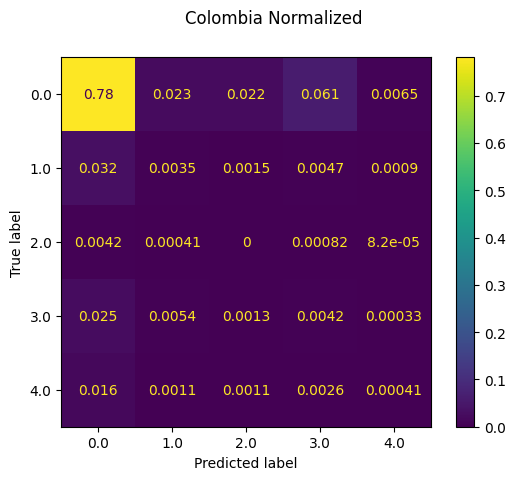

In [17]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_true_c, y_pred_c, normalize = 'all')
disp.figure_.suptitle("Colombia Normalized")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()